# Customer Complaints Classification

## Project Overview

This project leverages Natural Language Processing (NLP) techniques to automatically classify customer complaints. By training an NLP model to understand the content of complaints, the system can reduce the number of questions customers need to answer before submitting their issues. The primary goals are:

1. To minimize the time customers spend logging complaints by reducing the number of survey questions.
2. To create a user-friendly platform that allows customers to quickly submit their complaints or feedback.

Objectives:

* Train an NLP model to automatically classify consumer complaints into predefined categories based on their content.
* Enhance the customer complaint logging experience by streamlining the complaint submission process.
* Improve financial institutions' responsiveness by providing faster, more accurate categorization of complaints.

This project will explore the use of machine learning models such as text classification algorithms, potentially including logistic regression, support vector machines, or neural networks, combined with advanced NLP techniques like TF-IDF and word embeddings to understand the nature of customer complaints effectively.

## Business Understanding

**Problem Statement**:

Customers of financial institutions often experience significant frustration and dissatisfaction when lodging complaints related to financial services. The existing complaint submission processes typically involve navigating through multiple selection options or answering a series of questions generated by chatbots. This complexity not only prolongs the time required to submit a complaint but also adds to customer frustration, especially when timely resolution is critical. There is a pressing need for a faster and more efficient method for customers to lodge complaints without the burden of excessive questioning.

**Root Causes**:

* **Complex Navigation Structures:** Current platforms require customers to traverse numerous menus and options, making the submission process cumbersome.

* **Inefficient Chatbot Interactions:** Chatbots often generate redundant or irrelevant questions, leading to extended interaction times and increased customer irritation.

* **Lack of Personalization:** The absence of tailored pathways for different types of complaints results in a one-size-fits-all approach that does not address specific customer needs effectively.

* **Inadequate Data Utilization:** Existing systems may not fully leverage customer data to streamline the complaint submission process, leading to repetitive information requests.

**Key stakeholders:**

**1. Customers:** Play a crucial role in submitting complaints and providing feedback regarding financial services. They are primarily interested in seeking a quick and hassle-free method to lodge complaints and receive timely resolutions. To achieve this, customers require an intuitive and straightforward complaint submission interface that minimizes the number of steps and questions needed to lodge a complaint. Additionally, they seek assurance that their issues will be resolved promptly and effectively.

**2. Customer Service Support Teams:** Responsible for handling and resolving customer complaints efficiently. Their primary interest lies in managing and categorizing incoming complaints swiftly to expedite resolutions. To support these goals, they require simplified complaint categorization processes that speed up resolution times. Additionally, access to comprehensive and accurate complaint data is essential for effective management. Tools that allow them to track and monitor complaint statuses efficiently are also necessary to maintain high levels of service quality.

## Data Understanding

The Consumer Complaints Dataset from the Consumer Financial Protection Bureau (CFPB) provides a comprehensive source of real-world data on consumer grievances about various financial products and services. This dataset, accessible to the public, is particularly useful for natural language processing (NLP) projects, as it includes detailed narratives describing consumer complaints. These narratives cover disputes ranging from credit reporting issues to debt collection practices, providing a valuable foundation for developing an NLP model that can automatically classify and route complaints.

The dataset version we leveraged from kaggle includes thousands of consumer submissions categorized into five (5) financial product classes:

* Credit Reporting
* Debt Collection
* Mortgages and Loans (includes car loans, payday loans, student loans, etc.)
* Credit Cards 
* Retail Banking (includes checking/savings accounts, as well as money transfers, etc.)


It consists of around 162,400 records, with narratives of varying lengths and detail. Although this categorization streamlined the data, it remains imbalanced, with 56% of complaints relating to credit reporting issues and the remaining categories ranging between 8% and 14%. This imbalance presents a challenge in building an effective model, requiring tailored strategies to ensure accurate and balanced classification across all categories.



## Data Exploration

In [1]:
import zipfile
import pandas as pd

# Load and inspect the data
# Define the path to the zip file and the CSV file inside it
zip_path = 'data_comp.zip'
csv_filename = 'consumer_complaints.csv'

# Open the zip file and load the CSV file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    with zip_ref.open(csv_filename) as file:
        df = pd.read_csv(file)

# Displaying the first few raws of the dataframe
df.head()

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [2]:
# Displaying basic information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162421 entries, 0 to 162420
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  162421 non-null  int64 
 1   product     162421 non-null  object
 2   narrative   162411 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.7+ MB


The dataset has 162,421 entries and three columns:

1. **Unnamed: 0:** Appears to be an index column and can be ignored or removed.
2. **product:** Contains the complaint category (target variable) with values like credit_card, retail_banking, credit_reporting, etc.
3. **narrative:** Contains the text of each complaint.

Notably, the narrative column has 10 missing entries.

In [3]:
# Dropping the unnecessary 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])

# Dropping rows with missing values in the 'narrative' column
df = df.dropna(subset=['narrative'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162411 entries, 0 to 162420
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   product    162411 non-null  object
 1   narrative  162411 non-null  object
dtypes: object(2)
memory usage: 3.7+ MB


In [4]:
# Checking the distribution of the 'product' categories
product_distribution = df['product'].value_counts()

product_distribution

credit_reporting       91172
debt_collection        23148
mortgages_and_loans    18990
credit_card            15566
retail_banking         13535
Name: product, dtype: int64

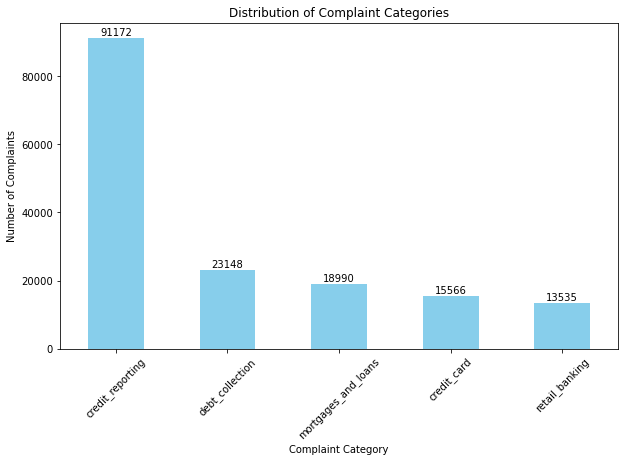

In [7]:
import matplotlib.pyplot as plt

# Plotting the distribution of complaint categories with complaint counts on top of each bar
plt.figure(figsize=(10, 6))
ax = product_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Complaint Categories')
plt.xlabel('Complaint Category')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)

# Adding text labels on top of each bar
for i, count in enumerate(product_distribution):
    ax.text(i, count + 200, str(count), ha='center', va='bottom')

plt.show()

The distribution shows a class imbalance, with the credit_reporting category significantly more represented than others. We’ll need to account for this imbalance during model training, using appropriate techniques.

In [5]:
# Checking for duplicate rows based on 'product' and 'narrative' columns
duplicates = df.duplicated(subset=['product', 'narrative']).sum()

duplicates

37735

There are 37,735 duplicate entries in the dataset based on the product and narrative columns. However, we opted to keep them since during model selection and training, we noted that removing the duplicates negatively impacted our best model performance.

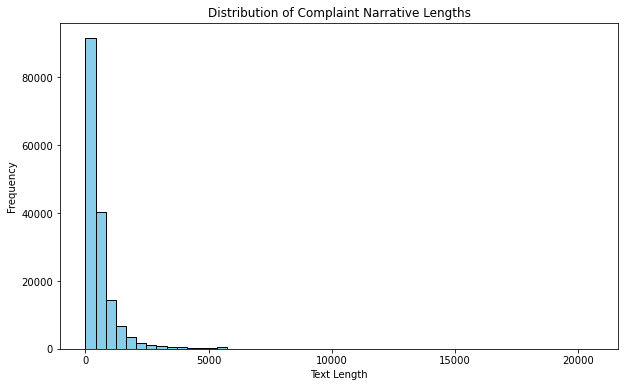

count    162411.000000
mean        588.535838
std         830.977413
min           3.000000
25%         192.000000
50%         361.000000
75%         683.000000
max       20596.000000
Name: text_length, dtype: float64

In [8]:
import matplotlib.pyplot as plt

# Checking the length of the complaint narrative
# Calculating the length of each complaint narrative
df['text_length'] = df['narrative'].apply(len)

# Summary statistics for text length
text_length_summary = df['text_length'].describe()

# Plotting the distribution of text length
plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Complaint Narrative Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

text_length_summary

The histogram indicates a right-skewed distribution, with most narratives having fewer than 1,000 characters. This information is helpful for choosing an appropriate text processing approach and handling extremely short or long complaints if necessary.

## Data Preprocessing